In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

Importing House Data Set

In [71]:
housedata = pd.read_csv('HouseData.csv')
housedata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Dropping Columns

In [72]:
housedata = housedata.drop(['bathrooms','sqft_lot','waterfront','view','sqft_above','lat','long','sqft_living15','sqft_lot15'],axis=1)

In [73]:
housedata.head()

,id,date,price,bedrooms,sqft_living,floors,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,20141013T000000,221900.0,3,1180,1.0,3,7,0,1955,0,98178
1,6414100192,20141209T000000,538000.0,3,2570,2.0,3,7,400,1951,1991,98125
2,5631500400,20150225T000000,180000.0,2,770,1.0,3,6,0,1933,0,98028
3,2487200875,20141209T000000,604000.0,4,1960,1.0,5,7,910,1965,0,98136
4,1954400510,20150218T000000,510000.0,3,1680,1.0,3,8,0,1987,0,98074


Checking whether any Data is missing


In [74]:
housedata.isna().any().any()

False

Checking Null Values


In [75]:
housedata.isnull()

,id,date,price,bedrooms,sqft_living,floors,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False


In [76]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
sqft_living      0
floors           0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

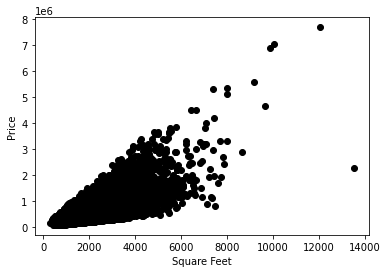

In [77]:
axisRepresent = housedata[["price", "sqft_living"]]
plt.scatter(axisRepresent["sqft_living"],axisRepresent["price"], c='black')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

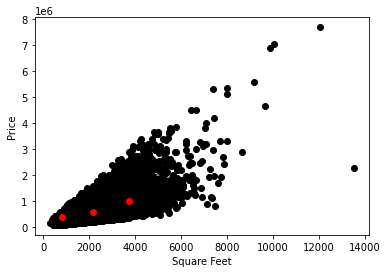

In [78]:
#Number Of Clusters
k = 3
Centroids = (axisRepresent.sample(n = k))
plt.scatter(axisRepresent["sqft_living"],axisRepresent["price"],c='black')
plt.scatter(Centroids["sqft_living"],Centroids["price"],c='red')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

In [79]:
diff = 1
j=0
while(diff!=0):
    XD=axisRepresent
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["sqft_living"]-row_d["sqft_living"])**2
            d2=(row_c["price"]-row_d["price"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        axisRepresent[i]=ED
        i=i+1
        
    C=[]
    for index,row in axisRepresent.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    axisRepresent["Cluster"]=C
    Centroids_new = axisRepresent.groupby(["Cluster"]).mean()[["price","sqft_living"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['price'] - Centroids['price']).sum() + (Centroids_new['sqft_living'] - Centroids['sqft_living']).sum()
        print(diff.sum())
    Centroids = axisRepresent.groupby(["Cluster"]).mean()[["price","sqft_living"]]

<ipython-input-79-0acb8bfc4f4e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axisRepresent[i]=ED
<ipython-input-79-0acb8bfc4f4e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axisRepresent["Cluster"]=C


192385.96849471898
186345.87730587088
149437.49160311258
91972.97446058008
65117.52560183809
56174.20832984976
45376.613056818314
42629.17986423395
38408.46486145724
42990.30369406665
27540.01698718515
27220.347399125723
17125.186421940052
22090.759543730943
13715.762816838153
5127.097049647271
9937.03063396834
6772.495246261593
1679.6595614758412
1035.6921296520554
7073.853345566796
8111.31377362778
1025.00382959213
1020.7742588902033
0.0


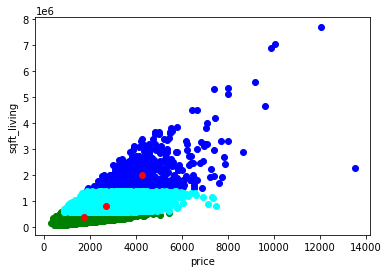

In [80]:
color=['blue','green','cyan']
for K in range(k):
    data=axisRepresent[axisRepresent["Cluster"]==K+1]
    plt.scatter(data["sqft_living"],data["price"],c=color[K])
plt.scatter(Centroids["sqft_living"],Centroids["price"],c='red')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

In [81]:
scaler = MinMaxScaler()

scaler.fit(data[['price']])
data['price'] = scaler.transform(data[['price']])

scaler.fit(data[['sqft_living']])
data['sqft_living'] = scaler.transform(data[['sqft_living']])

<ipython-input-81-a09b6213b11d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = scaler.transform(data[['price']])
<ipython-input-81-a09b6213b11d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_living'] = scaler.transform(data[['sqft_living']])


In [82]:
data.head()

,price,sqft_living,1,2,3,Cluster
3,0.023575,0.166163,1.385854e+06,231987.972717,193799.608786,3
5,0.792092,0.688822,7.648532e+05,852995.839874,427210.456302,3
10,0.095972,0.407855,1.327353e+06,290493.622585,135300.902057,3
15,0.080502,0.315710,1.339853e+06,277990.535575,147798.392734,3
26,0.435678,0.240181,1.052854e+06,564988.317456,139202.043525,3


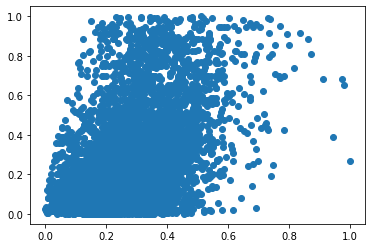

In [83]:
plt.scatter(data.sqft_living,data['price'])

In [84]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['sqft_living','price']])
y_predicted

array([2, 1, 2, ..., 0, 2, 0], dtype=int32)

In [85]:
data['cluster']=y_predicted
data.head()

<ipython-input-85-8c7e54cb12b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=y_predicted


,price,sqft_living,1,2,3,Cluster,cluster
3,0.023575,0.166163,1.385854e+06,231987.972717,193799.608786,3,2
5,0.792092,0.688822,7.648532e+05,852995.839874,427210.456302,3,1
10,0.095972,0.407855,1.327353e+06,290493.622585,135300.902057,3,2
15,0.080502,0.315710,1.339853e+06,277990.535575,147798.392734,3,2
26,0.435678,0.240181,1.052854e+06,564988.317456,139202.043525,3,0


In [86]:
km.cluster_centers_

array([[0.33185628, 0.34327851],
       [0.39560784, 0.7478799 ],
       [0.2178397 , 0.10115856]])

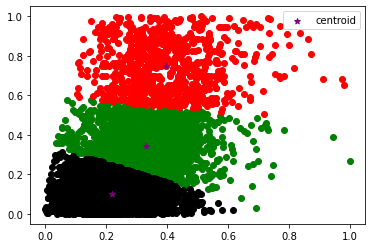

In [87]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.sqft_living,df1['price'],color='green')
plt.scatter(df2.sqft_living,df2['price'],color='red')
plt.scatter(df3.sqft_living,df3['price'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [88]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['sqft_living','price']])
    sse.append(km.inertia_)

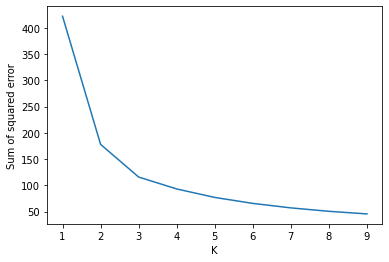

In [89]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)